In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format='retina'

In [83]:
df_sd = pd.read_csv('ulo_extended_results_sd.csv')
df = pd.read_csv('ulo_extended_results.csv')

In [84]:
df['relGap'] = df.apply(lambda row: 100*max(0,(row['F_hat']-row['F_check']))/np.maximum(1,np.abs(row['F_hat'])), axis=1)
df_sd['relGap'] = df_sd.apply(lambda row: 100*max(0,(row['F_hat']-row['F_check']))/np.maximum(1,np.abs(row['F_hat'])), axis=1)
df.drop(columns=['Unnamed: 0'],inplace=True)
df_sd.drop(columns=['Unnamed: 0'],inplace=True)

In [85]:
#define how to aggregate various fields
agg_functions = {'time': 'mean', 'F_hat': 'mean','rep':'first','F_check':'mean','relGap':'mean'}

#create new DataFrame by combining rows with same id values
df_sd_new = df_sd.groupby(by=['method', 'rel_dev_obj','rel_dev_cstr']).aggregate(agg_functions)
df_sd_new = df_sd_new.drop(columns=['F_hat','F_check'])
#df_new.set_index(['method'],inplace=True)
df_sd_new

time  rep        relGap
method        rel_dev_obj rel_dev_cstr                               
ES            0.1         0.1           250.469947    1  0.000000e+00
                          0.5           238.850563    1  0.000000e+00
                          2.0           246.411479    1  0.000000e+00
              0.5         0.1           261.052554    1  0.000000e+00
                          0.5           329.805732    1  0.000000e+00
                          2.0           270.074191    1  0.000000e+00
              1.0         0.1           273.373110    1  0.000000e+00
                          0.5           278.339624    1  0.000000e+00
                          2.0           220.699425    1  0.000000e+00
              5.0         0.1           263.885684    1  0.000000e+00
                          0.5           227.582450    1  0.000000e+00
                          2.0           229.398823    1  0.000000e+00
              10.0        0.1           320.696304    1  0.000000e+00
                          0.5           307.197886    1  0.000000e+00
                          2.0           228.041105    1  0.000000e+00
ULO           0.1         0.1             3.788354    0  1.933320e-14
                          0.5             4.503530    0  1.183634e-14
                          2.0             7.393881    0  2.012118e-14
              0.5         0.1             5.417544    0  3.999957e-02
                          0.5            17.557987    0  2.688534e-02
                          2.0            27.759181    0  6.781682e-03
              1.0         0.1             5.631287    0  4.573543e-03
                          0.5            32.945632    0  0.000000e+00
                          2.0            86.712250    0  2.341734e-02
              5.0         0.1             6.816268    0  0.000000e+00
                          0.5            88.431080    0  0.000000e+00
                          2.0           500.282710    0  1.438655e+00
              10.0        0.1            23.046929    0  0.000000e+00
                          0.5           117.137151    0  0.000000e+00
                          2.0           500.321657    0  3.975082e+00
bigM (direct) 0.1         0.1           193.808799    1  0.000000e+00
                          0.5           492.856840    1  0.000000e+00
                          2.0           505.785487    1  8.176913e+00
              0.5         0.1           507.302247    1  9.394094e-01
                          0.5           506.207193    1  4.681290e+00
                          2.0           511.277148    1  2.888452e+01
              1.0         0.1           156.412736    1  0.000000e+00
                          0.5           506.565554    1  1.511690e+01
                          2.0           507.321190    1  4.638651e+01
              5.0         0.1           502.508142    1  0.000000e+00
                          0.5           505.883354    1  1.746629e+01
                          2.0           505.915064    1  8.217647e+01
              10.0        0.1           506.214256    1  1.989076e+01
                          0.5           508.444260    1  3.371584e+01
                          2.0           507.816340    1  1.043424e+02

In [86]:
#define how to aggregate various fields
agg_functions = {'time': 'mean', 'F_hat': 'mean','rep':'first','F_check':'mean','relGap':'mean'}

#create new DataFrame by combining rows with same id values
df_new = df.groupby(by=['method', 'rel_dev_obj','rel_dev_cstr']).aggregate(agg_functions)
df_new = df_new.drop(columns=['F_hat','F_check'])

In [88]:
df_new.reset_index(inplace=True)
df_new.rename(columns={'rel_dev_cstr':'$\\zeta$'},inplace=True)
df_new

,index,method,rel_dev_obj,$\zeta$,time,rep,relGap
0,0,ES,0.1,0.1,2636.252103,1,0.000000e+00
1,1,ES,0.1,0.5,2738.641932,1,0.000000e+00
2,2,ES,0.1,2.0,2723.765240,1,0.000000e+00
3,3,ES,0.5,0.1,2762.143738,1,0.000000e+00
4,4,ES,0.5,0.5,2350.852964,1,0.000000e+00
5,5,ES,0.5,2.0,2158.039205,1,0.000000e+00
6,6,ES,1.0,0.1,2272.309451,1,0.000000e+00
7,7,ES,1.0,0.5,2380.230761,1,0.000000e+00
8,8,ES,1.0,2.0,2209.740090,1,0.000000e+00
9,9,ES,5.0,0.1,2253.231332,1,0.000000e+00


In [89]:
df_sd_new.reset_index(inplace=True)
df_sd_new.rename(columns={'rel_dev_cstr':'$\\zeta$'},inplace=True)
df_sd_new

,method,rel_dev_obj,$\zeta$,time,rep,relGap
0,ES,0.1,0.1,250.469947,1,0.000000e+00
1,ES,0.1,0.5,238.850563,1,0.000000e+00
2,ES,0.1,2.0,246.411479,1,0.000000e+00
3,ES,0.5,0.1,261.052554,1,0.000000e+00
4,ES,0.5,0.5,329.805732,1,0.000000e+00
5,ES,0.5,2.0,270.074191,1,0.000000e+00
6,ES,1.0,0.1,273.373110,1,0.000000e+00
7,ES,1.0,0.5,278.339624,1,0.000000e+00
8,ES,1.0,2.0,220.699425,1,0.000000e+00
9,ES,5.0,0.1,263.885684,1,0.000000e+00


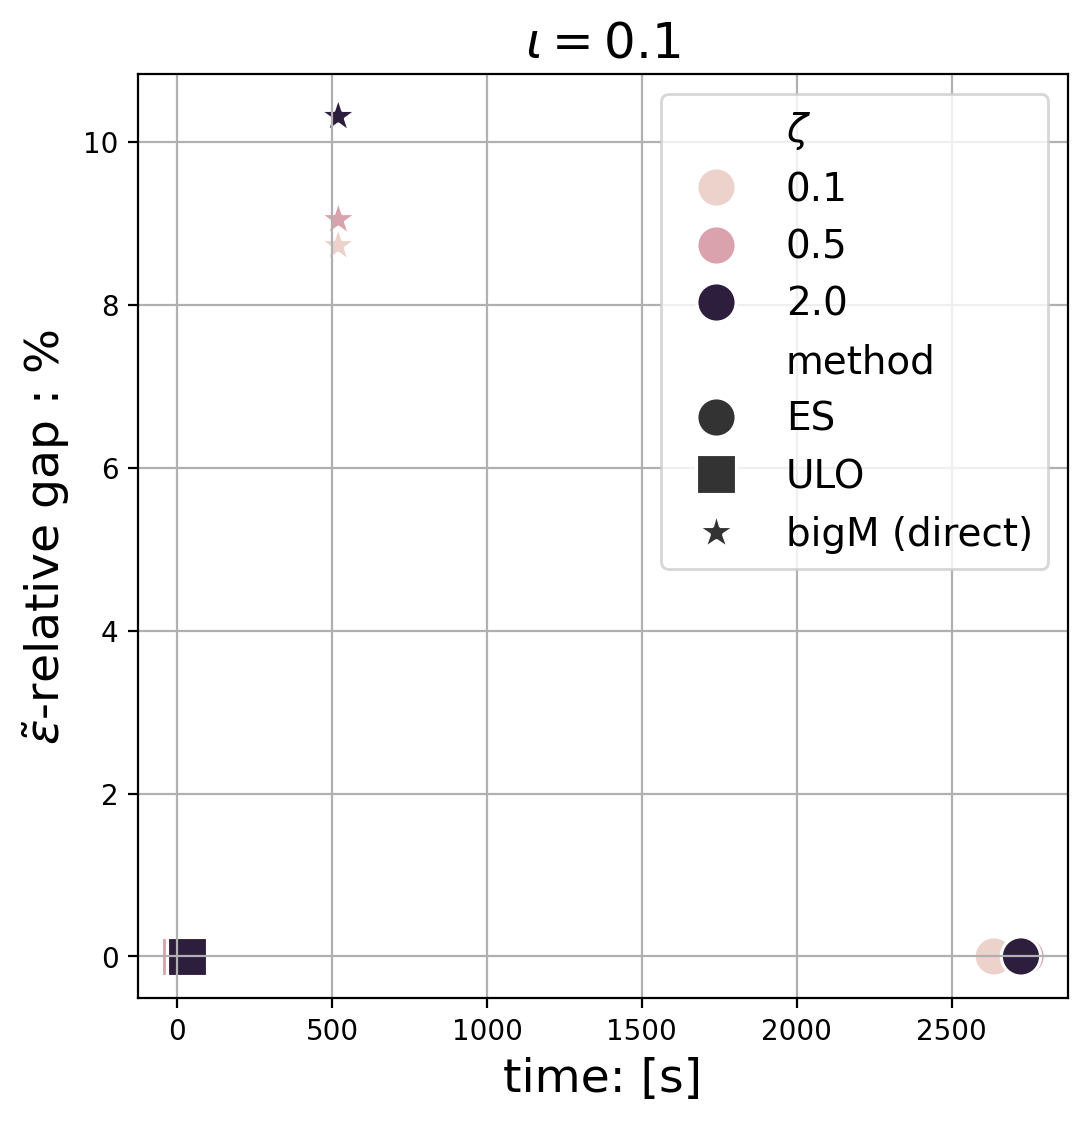

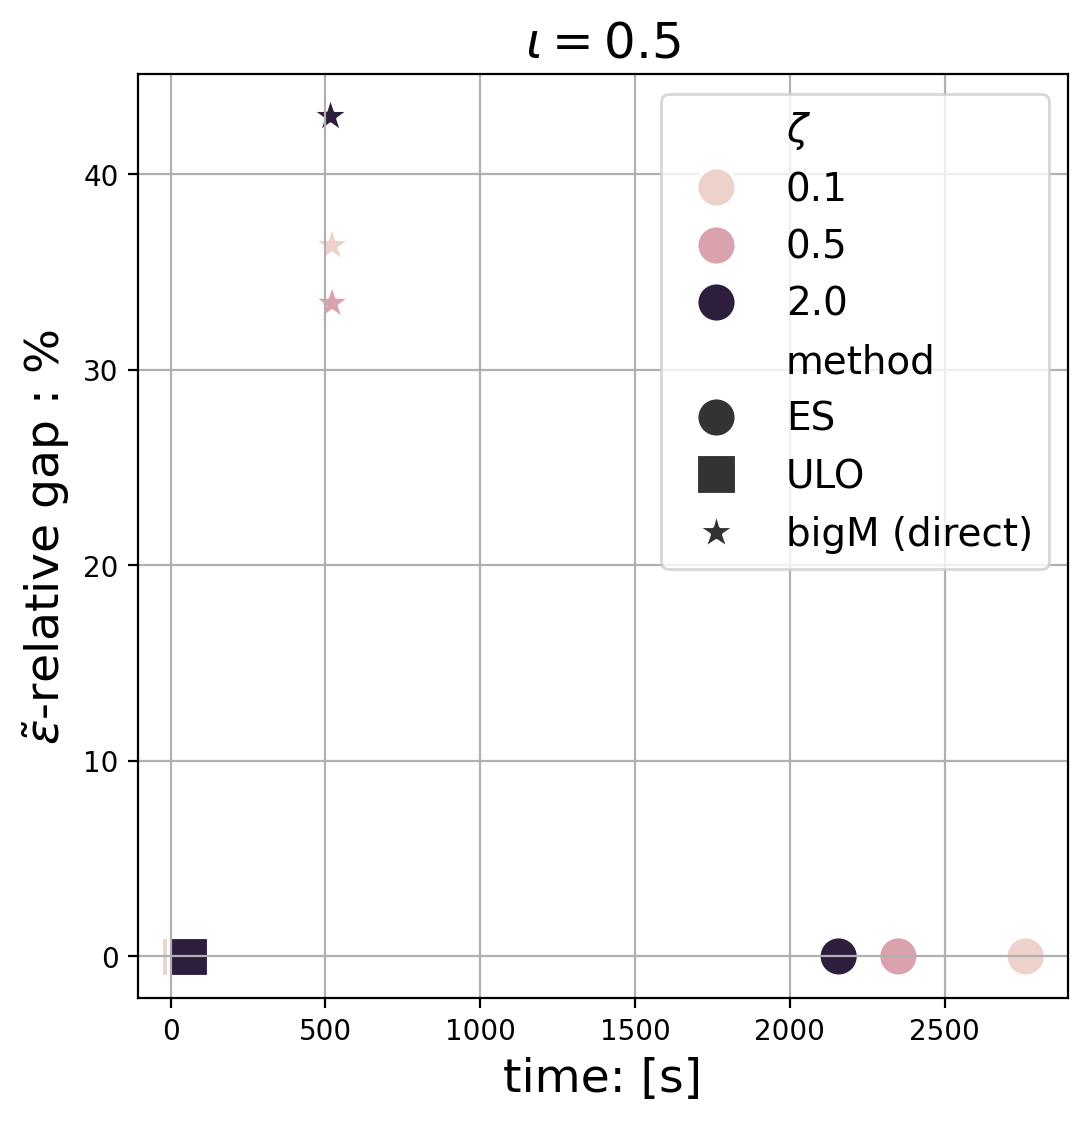

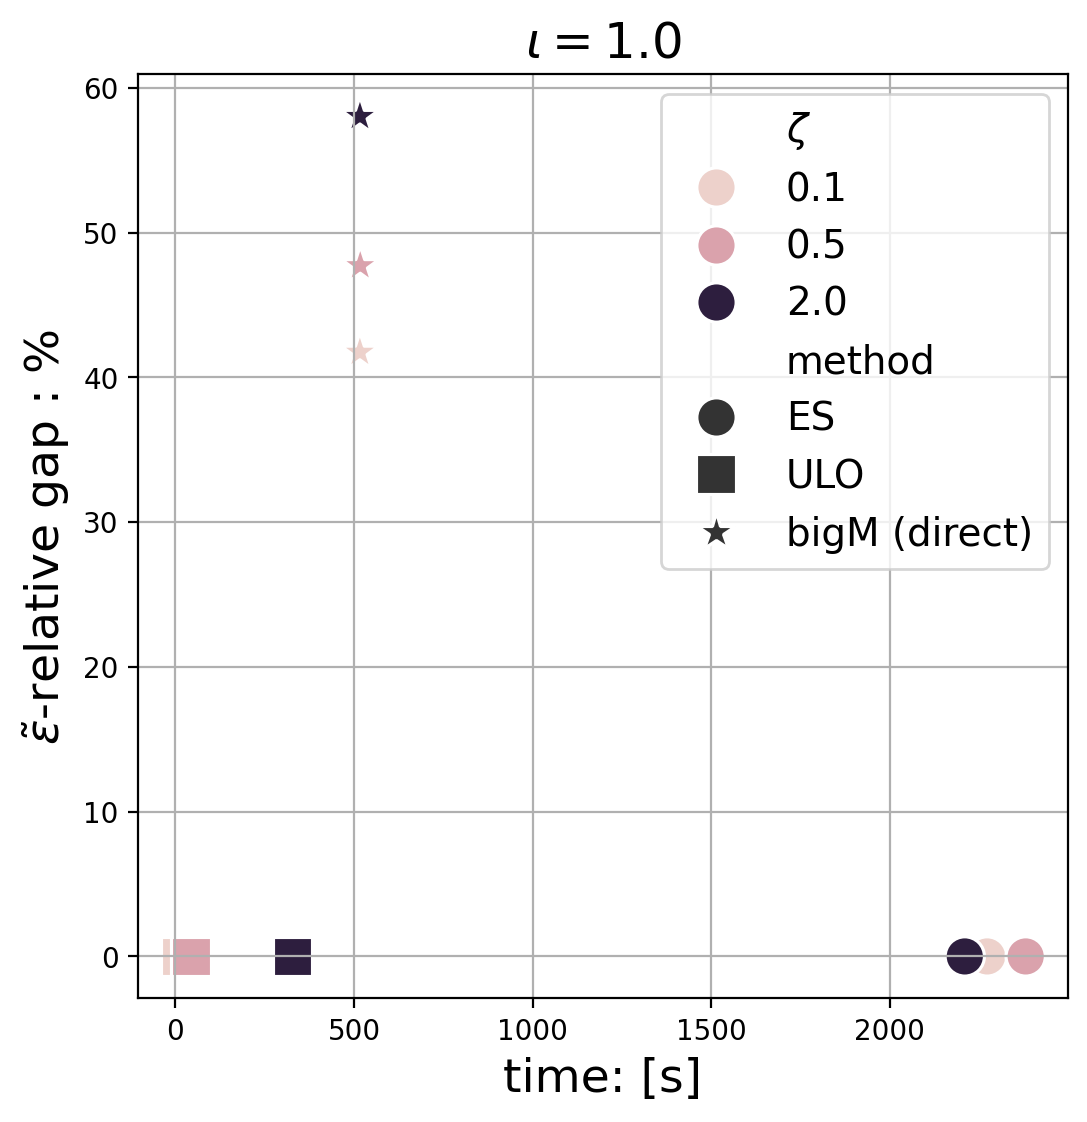

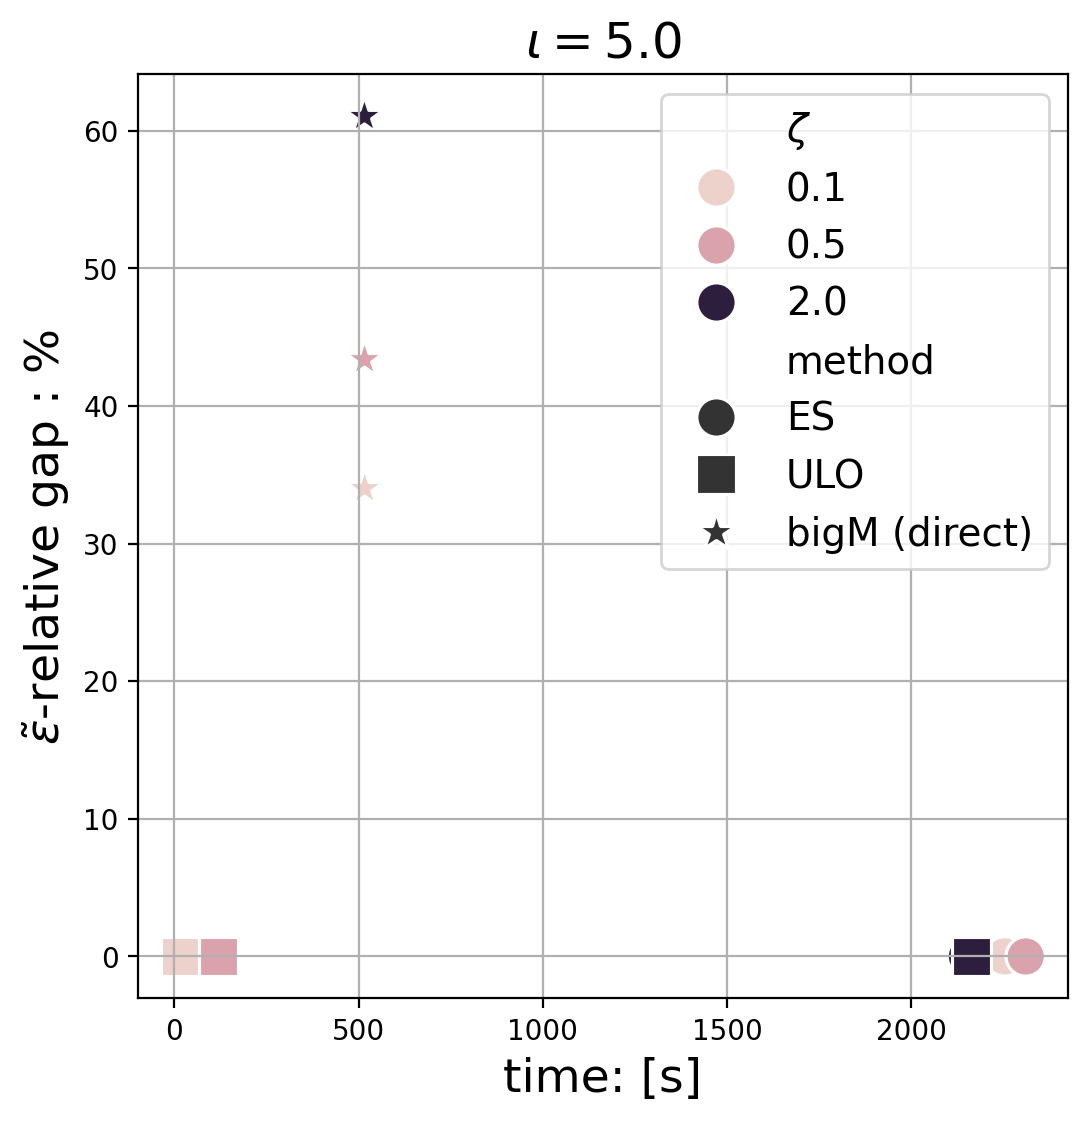

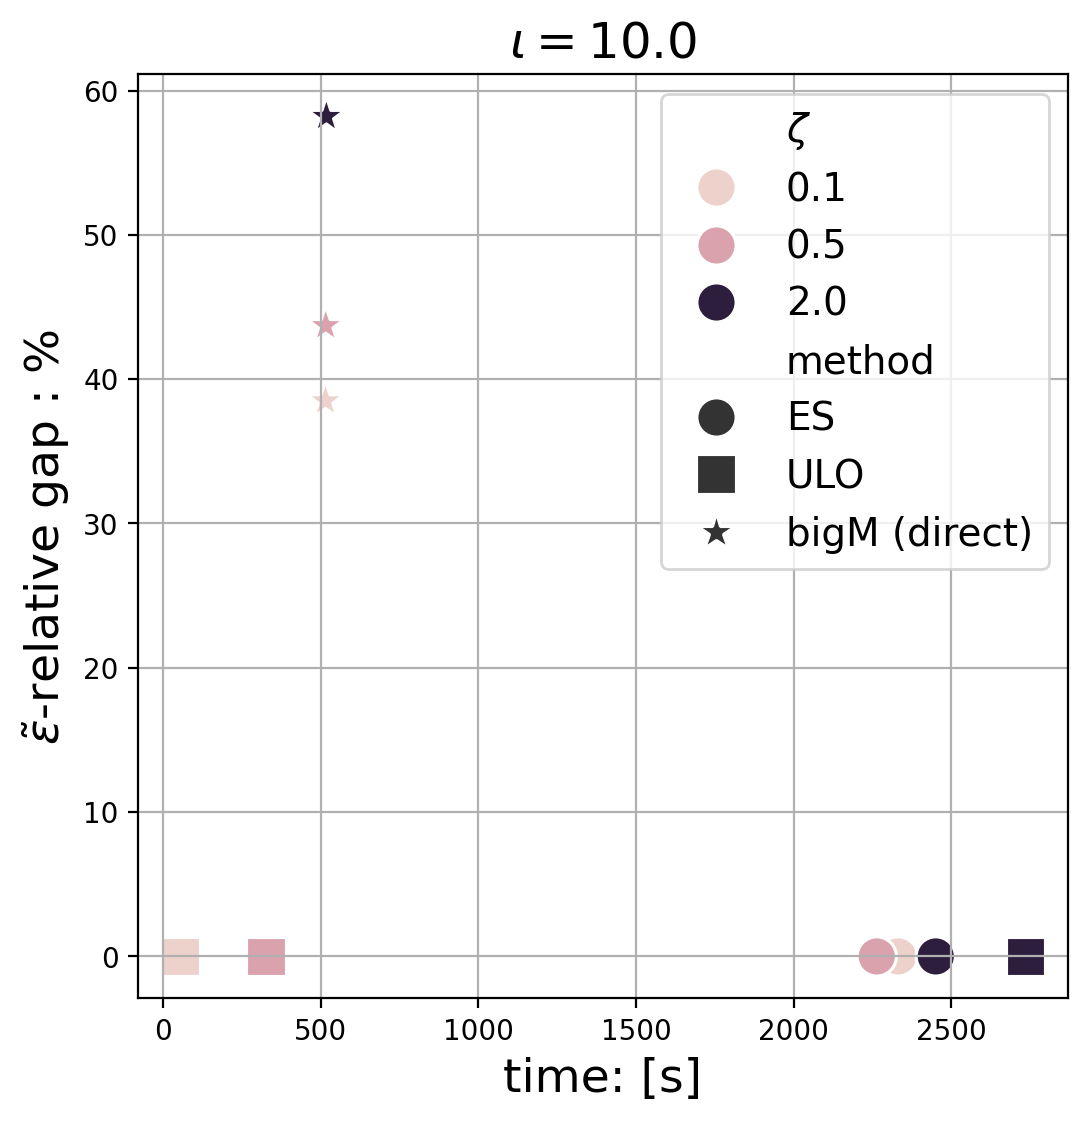

In [91]:
for value in df_new['rel_dev_obj'].unique():
        sub_df = df_new[(df_new['rel_dev_obj']==value)]
        f, ax = plt.subplots(figsize=(6, 6))
        plt.grid()
        plt.title('$\\iota = $'+str(value),fontsize=18)
        sns.scatterplot(data=sub_df, x='time', y='relGap',hue='$\\zeta$', style='method',s=200, markers=['o', 's','*'])
        plt.xlabel('time: [s]',fontsize=17)
        plt.ylabel('$\\tilde{\\epsilon}$-relative gap : %',fontsize=17)
        plt.legend(fontsize=14,title_fontsize=14)

In [ ]:
for value in df_new['rel_dev_obj'].unique():
        sub_df = df_sd_new[(df_sd_new['rel_dev_obj']==value)]
        f, ax = plt.subplots(figsize=(6, 6))
        plt.grid()
        plt.title('$\\iota = $'+str(value),fontsize=18)
        sns.scatterplot(data=sub_df, x='time', y='relGap',hue='$\\zeta$', style='method',s=200, markers=['o', 's','*'])
        plt.xlabel('time: [s]',fontsize=17)
        plt.ylabel('$\\tilde{\\epsilon}$-relative gap : %',fontsize=17)
        plt.legend(fontsize=14,title_fontsize=14)